# Clustering demo

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.cluster import *
from sklearn import metrics
from ipywidgets import interact, IntSlider, FloatSlider

%matplotlib inline

SEED = 1337

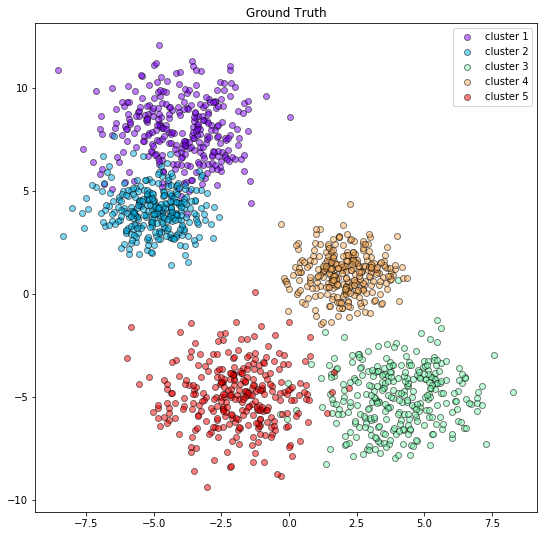

In [43]:
# generate dataset
from sklearn import datasets


cluster_centers = np.array([
                               [-4, 8],
                               [-5, 4],
                               [4, -5],
                               [2, 1], 
                               [-2, -5],
                            ])

# X = np.random.r
X, y = datasets.make_blobs(n_samples=1500, n_features=2, centers=cluster_centers, 
                           cluster_std=[1.5, 1, 1.5, 1, 1.5], 
                    center_box=(-10.0, 10.0), shuffle=True, random_state=SEED)

def print_dataset(X, y):
    noise = np.where(y < 0)[0]
    
    n_clusters = np.unique(y[y >= 0]).size
    colors = cm.rainbow(np.linspace(0.0, 1.0, n_clusters))

    plt.figure(figsize=(9,9))
    for label in range(n_clusters):

        X_cluster = X[y == label]
        plt.scatter(X_cluster[:,0], X_cluster[:, 1], c=colors[label], alpha=0.5, edgecolor='k', 
                    label="cluster %s" % (label+1))
        
    if noise.size > 0:
        X_cluster = X[y == -1]
        plt.scatter(X_cluster[:,0], X_cluster[:, 1], c='black', alpha=1, marker='x', label="noise")

    plt.legend()
    
print_dataset(X, y)
plt.title('Ground Truth')
plt.show()

In [35]:
np.where(y < 0)[0]

array([], dtype=int64)

# K-means with euclidean distance

In [48]:
n_clusters_slider = IntSlider(min=2, max=10, step=1, value=5)


@interact(n_clusters=n_clusters_slider)


def plot(n_clusters):
    model = KMeans(n_clusters=n_clusters, n_jobs=-1, random_state=SEED)
    y_pred = model.fit_predict(X)
    
    print_dataset(X, y_pred)
    plt.title('K-means Clustering k= %d' % n_clusters)
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred)
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean\t\t %2.4f' % s)
    
    

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=2), Output()), _dom_classes=('widget-interact',))

# Kmeans with manhattan distance

In [58]:
n_clusters_slider = IntSlider(min=2, max=10, step=1, value=5)


@interact(n_clusters=n_clusters_slider)


def plot(n_clusters):
    model = KMeans(n_clusters=n_clusters, precompute_distances=True, n_jobs=-1, random_state=SEED)
    
    dist = metrics.pairwise_distances(X, metric='manhattan')
    
    y_pred = model.fit_predict(dist)
    
    print_dataset(X, y_pred)
    plt.title('K-means Clustering k= %d' % n_clusters)
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred, metric='manhattan')
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean silhouette\t %2.4f' % s)
    
    

interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=2), Output()), _dom_classes=('widget-interact',))

In [60]:
min_samples_slider = IntSlider(min=2, max=10, step=1, value=5)
eps_slider = FloatSlider(min=0.1, max=1, step=0.1, value=0.5)


@interact(min_samples=min_samples_slider, 
          eps=eps_slider,
         )


def plot(min_samples, eps):
    model = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean', n_jobs=-1)
    y_pred = model.fit_predict(X)
    
    print_dataset(X, y_pred)
    plt.title('DBSCAN eps= %1.1f, min_samples=%d' % (eps, min_samples))
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    noise_ratio = np.sum(y_pred == -1) / y.size
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean silhouette\t %2.4f' % s)
    print('noise ratio\t %.3f' % noise_ratio)
    
    

interactive(children=(IntSlider(value=5, description='min_samples', max=10, min=2), FloatSlider(value=0.5, description='eps', max=1.0, min=0.1), Output()), _dom_classes=('widget-interact',))

# Agglomerative Clustering with average linkage

In [62]:
n_clusters_slider = IntSlider(min=2, max=10, step=1, value=5)


@interact(n_clusters=n_clusters_slider)


def plot(n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
    
    y_pred = model.fit_predict(X)
    
    print_dataset(X, y_pred)
    plt.title('Agglomerative Clustering k= %d' % n_clusters)
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean silhouette\t %2.4f' % s)
    
    



interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=2), Output()), _dom_classes=('widget-interact',))

In [64]:
n_clusters_slider = IntSlider(min=2, max=10, step=1, value=5)


@interact(n_clusters=n_clusters_slider)


def plot(n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    
    y_pred = model.fit_predict(X)
    
    print_dataset(X, y_pred)
    plt.title('Agglomerative Clustering k= %d' % n_clusters)
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean silhouette\t %2.4f' % s)
    
    



interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=2), Output()), _dom_classes=('widget-interact',))

In [65]:
n_clusters_slider = IntSlider(min=2, max=10, step=1, value=5)


@interact(n_clusters=n_clusters_slider)


def plot(n_clusters):
    model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='complete')
    
    y_pred = model.fit_predict(X)
    
    print_dataset(X, y_pred)
    plt.title('Agglomerative Clustering k= %d' % n_clusters)
    plt.show()
    
    h, c, v = metrics.homogeneity_completeness_v_measure(y, y_pred)
    s = metrics.silhouette_score(X, y_pred, metric='euclidean')
    print('homogenity\t %2.4f' % h)
    print('completeness\t %2.4f' % c)
    print('v-mesure\t %2.4f' % v)
    print('mean silhouette\t %2.4f' % s)
    
    



interactive(children=(IntSlider(value=5, description='n_clusters', max=10, min=2), Output()), _dom_classes=('widget-interact',))